<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [2]:
## Create 400 random data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [3]:
make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

(array([[ 8.15262288e-01, -5.43178212e-01],
        [-9.73019897e-02, -2.62489283e-01],
        [-6.52701909e-01,  8.35627988e-01],
        [-1.00911414e+00, -2.53025401e-01],
        [ 1.56829639e-01,  2.66086577e-01],
        [ 6.43408177e-02, -2.34653010e-01],
        [-9.13546207e-01, -2.69377142e-02],
        [ 1.38847598e-02, -2.82860334e-01],
        [-4.11797897e-01,  8.21441717e-01],
        [ 5.18573601e-01,  9.44004783e-01],
        [-2.01123178e-01, -2.60616440e-01],
        [ 1.40122452e-02,  2.95541038e-01],
        [-2.34073186e-03, -2.48620827e-01],
        [-2.30862579e-01, -9.39471331e-01],
        [-2.63912865e-01, -2.12462258e-01],
        [ 5.51468543e-02, -2.74512870e-01],
        [ 9.59442754e-01,  2.47499803e-01],
        [-1.07277794e+00,  7.63220093e-02],
        [ 2.78810256e-01, -1.88282033e-01],
        [ 7.58853897e-01,  6.19302143e-01],
        [ 2.53466285e-01,  1.01464945e-01],
        [ 7.65766210e-01, -5.98967688e-01],
        [ 3.15392862e-03, -2.915

In [4]:
X1

array([[-0.22188245, -0.0262505 ],
       [-0.87252059, -0.57152243],
       [ 0.75646983, -0.62412893],
       [-0.80397144,  0.55365634],
       [-0.29731292,  0.01877337],
       [ 0.65151905, -0.89187858],
       [-0.00315757, -0.24414658],
       [-0.76760135, -0.57760536],
       [ 0.12192638,  0.14822394],
       [ 0.3153407 ,  0.02302963],
       [ 0.30164706, -0.00277579],
       [ 0.21990717,  0.02002275],
       [ 0.13612462,  0.31227314],
       [-0.20191105, -0.95427223],
       [ 0.06720223,  0.96619375],
       [-0.29635355,  0.00819001],
       [-0.27300912,  0.18261221],
       [ 0.20207587, -0.11074471],
       [-0.01312286, -0.32390311],
       [-0.2794176 , -0.20622748],
       [-0.24794527,  0.11689177],
       [-0.30862934, -0.21104936],
       [-0.99010554, -0.04237793],
       [ 1.00054655, -0.24145078],
       [ 0.98422805, -0.00707523],
       [-0.97466975, -0.1644915 ],
       [-0.08765372, -0.30837259],
       [-0.8834349 , -0.32550722],
       [-0.02367204,

In [5]:
## Convert data into a DataFrame

# Declare the columns names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [6]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.002967   -0.002133
std      0.525026    0.522285
min     -1.135220   -1.083776
25%     -0.297784   -0.293462
50%     -0.009153    0.008043
75%      0.282365    0.283424
max      1.106778    1.079342

Sample of X__________________________________________________
          A         B
0 -0.221882 -0.026250
1 -0.872521 -0.571522
2  0.756470 -0.624129
3 -0.803971  0.553656
4 -0.297313  0.018773


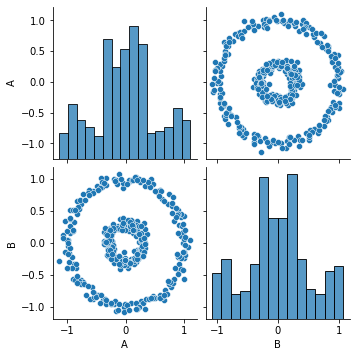

In [7]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [18]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    return centroids

In [19]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( ( (p - q) ** 2 ).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [20]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    return c

In [21]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    
    for i in range(len(centroids)):
        for s in range(step + 1):
            e = [z[i][0] for z in centroids_list]
            f = [z[i][1] for z in centroids_list]
            ax.plot(e, f, c = 'k', marker = '+', linewidth = 1)
            
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [22]:
## Flag intermediate output

step = 0
show_steps = False # for testing/debugging
# show_steps = False #without showing steps

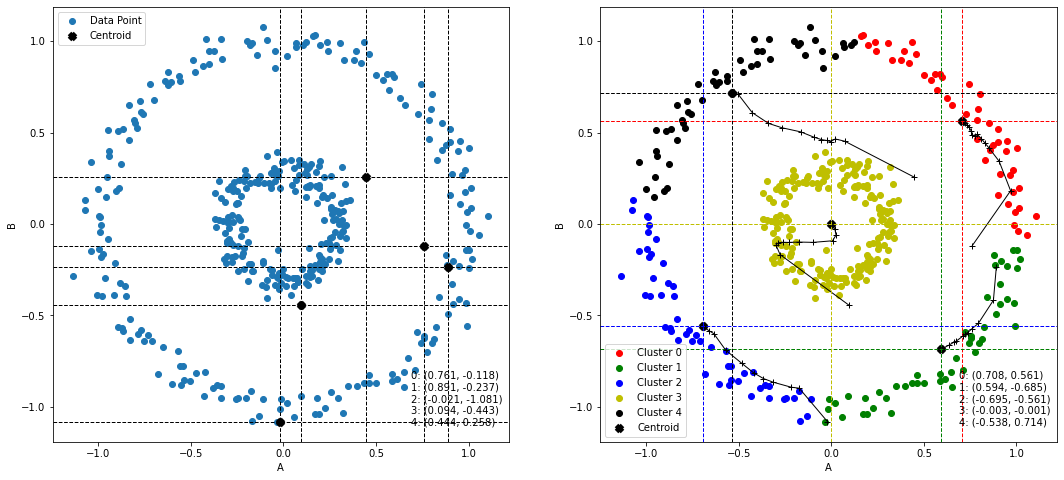

In [25]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 5 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

>

### Question: What happens if the algorithm is run multiple times?

In [ ]:
different cluster labels will be assigned to each cluster/datapoints, this model is not robust

### Question: What happens if `K` is changed?

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



